### Testing recov

In [1]:
from mil_models import TransMIL_peg
from pandas_dataloader import Pandas_Dataset
from train_mil import preprocess_data,train_full,val_one_epoch,collate
# import argparse
from pathlib import Path
import torch
import time
import torchmetrics
import pandas as pd
import numpy as np

class args_parse:
    def __init__(self,**kwargs):
        self.__dict__.update(kwargs)

args = args_parse(seed=1,
                  data_root_dir='/localdisk3/ramanav/TCGA_processed/PANDAS_MIL_Patches_Ctrans_1MPP/',
                  csv_path='/aippmdata/public/PANDAS',
                  save_dir='/home/ramanav/Projects/ReCoV/results/pandas',
                  num_classes=6,
                  batch_size=64,
                  lr=1e-4,
                  lamda=0.0005,
                  patience=10,
                  num_epochs=30,
                  n_folds=5,
                #   model_name="15Dec_09_26_56_20_2.5_s1_[1, 1, 0]",
                  # model_name="20Dec_15_47_06_20_2.5_s1_[0, 0, 0, 1]_0",
                  model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1",
                  exclusion=False)

MODEL_NAME = args.model_name
ROOT_PATH = Path(args.save_dir)
EXCLUSION = args.exclusion
THRESHOLD = 0.4
DEVICE = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")
timestamp = time.strftime("_%d%b_%H_%M_%S", time.gmtime())

#model defination
model = TransMIL_peg(n_classes=args.num_classes-1)

#Prepare data
(X_train_clean,y_train_clean),(X_val_clean,y_val_clean),(X_test_clean,y_test_clean), _ = preprocess_data(args)
X_train_clean["isup_grade"] = y_train_clean
train_split = X_train_clean.reset_index(drop=True)
X_val_clean["isup_grade"] = y_val_clean
val_split = X_val_clean.reset_index(drop=True)
X_test_clean["isup_grade"] = y_test_clean
train_split = pd.concat((X_train_clean,X_val_clean))
# train_split = train_split.sort_values(by="image_id").reset_index(drop=True)
# train_split["int_id"] = train_split.index
test_split = X_test_clean.reset_index(drop=True)


# metricfunc = torchmetrics.MetricCollection([torchmetrics.Accuracy(num_classes=args.num_classes,average=None),
                                        # torchmetrics.F1Score(num_classes=args.num_classes,average='weighted'),
                                        # ])

# testmetricdict = metricfunc.clone(prefix='test_').to(DEVICE)

/home/ramanav/anaconda3/envs/graph/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
test_split[["int_id","image_id","data_provider","isup_grade"]].to_csv(f"../results/pandas/testsplit.csv",index=False)

In [ ]:
test_split[["int_id","image_id","data_provider","isup_grade"]]["isup_grade"].value_counts()

,int_id,image_id,data_provider,isup_grade
0,385,0bd0a172d1f92a1c8bb43585affe0648,karolinska,2
1,4083,757b7b672e19cfa1350f8477f4b5d66e,karolinska,2
2,3622,69170d42ade5329fe02df566a7447a99,karolinska,4
3,8916,fa8bd8ed36122387823f6b268e6ecb83,karolinska,1
4,8994,fcad09ea1c5ae52d28fcd345c0a30b34,karolinska,5
...,...,...,...,...
1362,1601,2ef31e571dd843c12f74ac96c3793d9f,radboud,4
1363,6433,b4ec9258133fcb21d9c99fc2ae9d134e,radboud,0
1364,33,01227af585a47c16680f927d21a7f06a,radboud,1
1365,7973,e08b3873a528bb51f5e099eddeedee5c,radboud,1


0    393
1    350
2    167
4    154
3    154
5    149
Name: isup_grade, dtype: int64

In [13]:
train_split[["int_id","image_id","data_provider","isup_grade"]].sort_values(by="image_id")

,int_id,image_id,data_provider,isup_grade
0,0,0005f7aaab2800f6170c399693a96917,karolinska,0
1,1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0
2,2,0018ae58b01bdadc8e347995b69f99aa,radboud,4
3,3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4
4,4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0
...,...,...,...,...
9121,9121,ffcee00fd033d3ece1408035a7fd4ea7,karolinska,1
9122,9122,ffd2841373b39792ab0c84cccd066e31,radboud,0
9123,9123,ffdc59cd580a1468eac0e6a32dd1ff2d,radboud,5
9124,9124,ffe06afd66a93258f8fabdef6044e181,radboud,0


In [9]:
df_try = pd.read_csv("../results/pandas/splitsave__02Jan_19_37_48_20_s1_[1, 0]_1.csv")
df_try.iloc[2345]

int_id                                       2345
image_id         500d4f7a12600df45965673dd4642d4f
data_provider                             radboud
isup_grade                                      1
Name: 2345, dtype: object

In [5]:
train_split

,int_id,image_id,data,data_provider,isup_grade
0,6817,c022687b86e4e3eac79381053480e039,"[[tensor(-0.0195), tensor(-0.0630), tensor(-0....",karolinska,1
1,1936,387c0c2633848a562d0299cb667239fd,"[[tensor(0.0177), tensor(0.1051), tensor(-0.04...",karolinska,2
2,2685,4e6e65a0d88a155afa71221ceceee985,"[[tensor(-0.0254), tensor(-0.0553), tensor(0.0...",karolinska,0
3,950,1c691c8c6fd05875e916519e1dca50a0,"[[tensor(0.0057), tensor(-0.0147), tensor(0.03...",karolinska,0
4,5749,a26721b3a8229e8e5e995f7a4a7974f8,"[[tensor(-0.0295), tensor(-0.0052), tensor(0.0...",karolinska,0
...,...,...,...,...,...
6363,7372,cf19c18868fc35dfd2628358ca4b73f1,"[[tensor(0.0092), tensor(-0.2045), tensor(-0.0...",radboud,1
6364,5302,9772f0e2dc3c38aa876aa4b6c4c85377,"[[tensor(0.0276), tensor(-0.0994), tensor(0.00...",radboud,3
6365,5747,a260fec22534be7e93d7f456ada4f452,"[[tensor(0.0906), tensor(-0.0064), tensor(0.06...",radboud,0
6366,1030,1eab1d74f5c90e353ce5f4440b502bc3,"[[tensor(0.0654), tensor(-0.1642), tensor(0.02...",radboud,2


In [7]:
val_split

,int_id,image_id,data,data_provider,isup_grade
0,4117,765b21a22c0ced4bd463ac18bca81705,"[[tensor(-0.0213), tensor(-0.0615), tensor(0.0...",karolinska,4
1,5610,9f2739434a4444b74f5cbe8888a77ea2,"[[tensor(-0.0034), tensor(-0.0002), tensor(0.0...",karolinska,3
2,4276,7adb9a199022845663b36db49852383b,"[[tensor(0.0205), tensor(-0.0106), tensor(0.05...",karolinska,2
3,791,177373821195cf33e7bc4c8bcd089a2e,"[[tensor(-0.0003), tensor(-0.0150), tensor(0.0...",karolinska,0
4,1520,2c66a2cdbbfc4bd3b96f1039ad3fa630,"[[tensor(-0.0187), tensor(0.0762), tensor(-0.0...",karolinska,5
...,...,...,...,...,...
1366,5898,a6df5267338c181ee62b42087d0e2292,"[[tensor(0.0212), tensor(-0.1841), tensor(0.09...",radboud,3
1367,3627,69240805aeb7c006dffd474b1253139f,"[[tensor(-0.0254), tensor(-0.1732), tensor(0.1...",radboud,1
1368,8767,f6b3c12a983a398bfafee0027cf523d5,"[[tensor(0.0632), tensor(-0.1299), tensor(0.11...",radboud,0
1369,3518,658be675223ffa5509203009eb7bba89,"[[tensor(-0.0378), tensor(-0.0346), tensor(-0....",radboud,3


In [2]:
# load recov data
if EXCLUSION:
    path = ROOT_PATH/f"memory__{MODEL_NAME}.npy"
    split = pd.read_csv(ROOT_PATH/f"splitsave__{MODEL_NAME}.csv")
    data = np.load(path)
    split["memory"] = data
    index_list = split.loc[split["memory"]>THRESHOLD,"image_id"].tolist()
    # train_split = train_split.loc[train_split["image_id"].isin(index_list)]
    # val_split = val_split.loc[val_split["image_id"].isin(index_list)]

In [12]:
temp = split.loc[split["memory"]<=np.percentile(split["memory"],10)].sort_values(by=["memory"])

In [14]:
np.percentile(split["memory"],10)

3.994487622692946

In [13]:
temp["isup_grade"].value_counts()

1    177
3    145
4    138
5    134
2     96
0     84
Name: isup_grade, dtype: int64

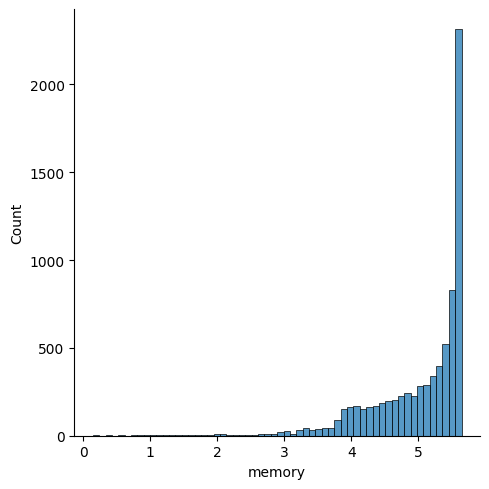

In [7]:
import seaborn as sns
sns.displot(split["memory"])

In [6]:
split["memory"].max()

5.645722269316838

### Checking initial results of recov pandas

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
# model_name = "14Dec_10_50_40_20_2.5_s1_[1, 1, 1]"
# model_name = "15Dec_09_26_56_20_2.5_s1_[1, 1, 0]"
# model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
# model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
# model_name = "02Jan_19_37_48_20_s1_[1, 0]_1"
# model_name = "12Jan_14_58_46_20_s1_[1, 0]_1_changemem"
model_name = "17Jan_09_22_35_20_s1_[1, 0]_1_origfoldsplit"
# path = f"../results/pandas/memory__{model_name}_20_v2.npy"
# path = f"../results/pandas/memory__{model_name}_v2.npy"
path = f"../results/pandas/memory__{model_name}_10_v2.npy"
split = pd.read_csv(f"../results/pandas/splitsave__{model_name}.csv")
data = np.load(path)
split["memory"] = data

In [3]:
split

,int_id,image_id,data_provider,isup_grade,memory
0,0,0005f7aaab2800f6170c399693a96917,karolinska,0,4.975043
1,1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,4.974771
2,2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4.689646
3,3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4.881833
4,4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,4.970836
...,...,...,...,...,...
7720,7720,ffcee00fd033d3ece1408035a7fd4ea7,karolinska,1,4.566808
7721,7721,ffd2841373b39792ab0c84cccd066e31,radboud,0,4.011210
7722,7722,ffdc59cd580a1468eac0e6a32dd1ff2d,radboud,5,4.945751
7723,7723,ffe06afd66a93258f8fabdef6044e181,radboud,0,4.364727


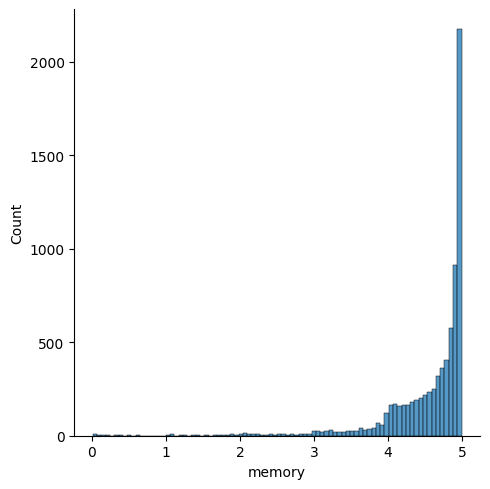

In [4]:
import seaborn as sns
sns.displot(split["memory"])

In [5]:
thresh = np.percentile(split["memory"],10)
print(f"threshold chosen: {thresh}")
split.loc[split["memory"]<=thresh].sort_values(by=["memory"])

threshold chosen: 3.95573263168335


,int_id,image_id,data_provider,isup_grade,memory
847,847,1dfa9e0e91f817fbd98ae93fc20d6255,karolinska,5,0.012446
5743,5743,bf282897514555144100efbee376bce1,radboud,5,0.019981
7612,7612,fc8bbe93363ee983d99c949f41ea180f,karolinska,5,0.020465
5343,5343,b1a8dc23435d6fea4a7847fcf02f9374,radboud,5,0.021718
2850,2850,610489a9612f4f28cd140e8326c909fa,radboud,5,0.033562
...,...,...,...,...,...
1308,1308,2d4511f3f129efc2865691aa75e5eb0a,radboud,2,3.951358
3217,3217,6d2141c1c6593fc206e2a695cb591831,karolinska,5,3.951826
374,374,0d73c6cef9ab76b13f53f6605e8d494e,karolinska,1,3.954342
3514,3514,76d58aad5928c554f665a8fad600dfb4,karolinska,3,3.955395


In [6]:
# df_orig = pd.read_csv("../results/pandas/train-5kfold_remove_noisy_by_0622_rad_13_08_ka_15_10.csv")
df_orig = pd.read_csv("../results/pandas/local_preds_final_1_efficientnet-b1.csv")
df_orig["memory"] = 5 - np.abs(df_orig["probs_raw"]-df_orig["isup_grade"])

In [7]:
df_orig.loc[df_orig["memory"]<=np.percentile(df_orig["memory"],10)].sort_values(by=["memory"])

,image_id,data_provider,isup_grade,gleason_score,kfold,probs_raw,probs_without_tta_raw,preds,preds_without_tta,memory
7818,b1a8dc23435d6fea4a7847fcf02f9374,radboud,5,4+5,4,0.022724,0.022610,0,0,0.022724
2058,fc07f0ce6d2cdff9d65591e94fc2130e,karolinska,5,4+5,1,0.041735,0.044941,0,0,0.041735
9795,9aea86aa9b34cebb8bbc0db42d6c7559,karolinska,5,5+5,5,0.046347,0.026655,0,0,0.046347
4360,1dfa9e0e91f817fbd98ae93fc20d6255,karolinska,5,5+5,3,0.117570,0.169771,0,0,0.117570
2862,610489a9612f4f28cd140e8326c909fa,radboud,5,5+5,2,0.137256,0.156138,0,0,0.137256
...,...,...,...,...,...,...,...,...,...,...
2310,1cb4a7d3594586b84849e63b828de968,radboud,0,negative,2,1.198579,0.824289,1,1,3.801421
7038,5a6125bdeb2906ba9267a26e98de56e5,radboud,3,4+3,4,4.197514,4.209855,4,4,3.802486
6324,070f9f27db2db32b456cfc595f29c03a,radboud,1,3+3,4,2.196971,2.212294,2,2,3.803029
2112,01f25f6392771aa0895dbbafba05054a,radboud,3,4+3,2,4.196616,4.207517,4,4,3.803384


/tmp/ipykernel_4899/1965795826.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_orig["memory"])


<AxesSubplot:xlabel='memory', ylabel='Density'>

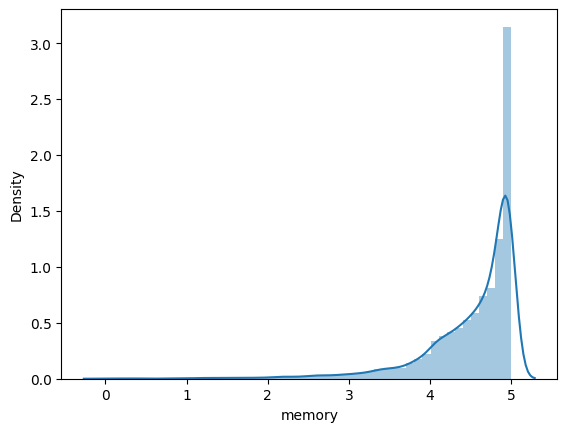

In [9]:
sns.distplot(df_orig["memory"])

In [9]:
df_orig.loc[df_orig["memory"]<=np.percentile(df_orig["memory"],10)]["data_provider"].value_counts()

radboud       756
karolinska    306
Name: data_provider, dtype: int64

In [51]:
df_orig.loc[df_orig["memory"]<=np.percentile(df_orig["memory"],10)]["isup_grade"].value_counts()

5    281
4    196
3    192
0    182
1    116
2     95
Name: isup_grade, dtype: int64

In [10]:
orig_noisy_sampl = set(df_orig.loc[df_orig["memory"]<=np.percentile(df_orig["memory"],10)].sort_values(by=["memory"])["image_id"].tolist())

In [11]:
recov_noisy_sampl = set(split.loc[split["memory"]<=np.percentile(split["memory"],10)].sort_values(by=["memory"])["image_id"].tolist())

In [12]:
len(recov_noisy_sampl)

773

In [12]:
len(orig_noisy_sampl.intersection(recov_noisy_sampl))

417

In [8]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["data_provider"].value_counts()

radboud       493
karolinska    280
Name: data_provider, dtype: int64

In [24]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["data_provider"].value_counts()

radboud       484
karolinska    289
Name: data_provider, dtype: int64

In [17]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["data_provider"].value_counts()

radboud       512
karolinska    262
Name: data_provider, dtype: int64

In [9]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["isup_grade"].value_counts()

3    181
5    172
4    152
1    105
2     96
0     67
Name: isup_grade, dtype: int64

In [11]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["isup_grade"].value_counts()

3    171
5    168
4    141
1    111
2    108
0     74
Name: isup_grade, dtype: int64

In [18]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["isup_grade"].value_counts()

5    192
3    140
4    138
0    122
1    103
2     79
Name: isup_grade, dtype: int64

In [1]:
import torch
from mil_models import TransMIL_peg
# model1 = torch.load("../results/pandas/03Jan_noexclusion_tmil.pt")

/home/ramanav/anaconda3/envs/graph/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [67]:
state = torch.load("../results/pandas/03Jan_noexclusion_tmil_statedict.pt")
model = TransMIL_peg(5)
model.load_state_dict(state)

<All keys matched successfully>

In [65]:
model1.state_dict()

OrderedDict([('cls_token',
              tensor([[[ 8.9374e-01, -1.0156e+00, -1.3364e+00,  6.2391e-01,  2.1358e-01,
                         1.1348e-01, -2.3994e-01,  1.8789e-01, -8.7122e-01, -3.8869e-01,
                        -1.3352e+00, -3.1474e-03,  5.1823e-01,  8.1431e-01,  9.5068e-01,
                         9.6479e-02, -3.7435e-01,  1.3239e+00,  6.1427e-01, -3.2130e-01,
                         2.8588e+00, -8.4195e-01,  3.2860e-01, -3.6524e-01,  2.4313e+00,
                        -1.3116e+00,  4.0128e-01,  2.7801e-01, -7.0286e-01,  3.8257e-01,
                        -7.4130e-01,  9.7522e-01,  9.5783e-01,  3.8290e-01, -1.7368e-01,
                        -2.7789e-01,  1.4220e-01, -2.1379e-01, -2.3365e-01,  1.7226e-01,
                        -1.0599e+00,  4.2762e-01,  7.3599e-01,  1.5765e+00,  3.8257e-01,
                         6.7757e-02, -2.5077e-01,  2.8805e-01,  1.0862e+00, -1.4200e-01,
                         1.3167e-01,  1.4000e+00, -2.3970e-01,  8.9726e-01, -3.2079

In [66]:
state

OrderedDict([('cls_token',
              tensor([[[ 8.9374e-01, -1.0156e+00, -1.3364e+00,  6.2391e-01,  2.1358e-01,
                         1.1348e-01, -2.3994e-01,  1.8789e-01, -8.7122e-01, -3.8869e-01,
                        -1.3352e+00, -3.1474e-03,  5.1823e-01,  8.1431e-01,  9.5068e-01,
                         9.6479e-02, -3.7435e-01,  1.3239e+00,  6.1427e-01, -3.2130e-01,
                         2.8588e+00, -8.4195e-01,  3.2860e-01, -3.6524e-01,  2.4313e+00,
                        -1.3116e+00,  4.0128e-01,  2.7801e-01, -7.0286e-01,  3.8257e-01,
                        -7.4130e-01,  9.7522e-01,  9.5783e-01,  3.8290e-01, -1.7368e-01,
                        -2.7789e-01,  1.4220e-01, -2.1379e-01, -2.3365e-01,  1.7226e-01,
                        -1.0599e+00,  4.2762e-01,  7.3599e-01,  1.5765e+00,  3.8257e-01,
                         6.7757e-02, -2.5077e-01,  2.8805e-01,  1.0862e+00, -1.4200e-01,
                         1.3167e-01,  1.4000e+00, -2.3970e-01,  8.9726e-01, -3.2079

In [31]:
torch.save(model.state_dict(),"../results/pandas/03Jan_exclusion_tmil_statedict.pt")

In [32]:
model = torch.load("../results/pandas/03Jan_noexclusion_tmil.pt")
torch.save(model.state_dict(),"../results/pandas/03Jan_noexclusion_tmil_statedict.pt")


: 

In [2]:
model = torch.load("../results/pandas/_06Jan_17_41_04_02Jan_19_37_48_20_s1_[1, 0]_1_1_officialsoln.pt")
torch.save(model.state_dict(),"../results/pandas/06Jan_exclusion_tmil_statedict_officialsoln.pt")

: 

In [2]:
model = torch.load("../results/pandas/_08Jan_14_31_55_07Jan_16_56_02_1_s1_[1, 0]_0_origsoln_1_officialsoln_2.pt")
torch.save(model.state_dict(),"../results/pandas/08Jan_exclusion_tmil_statedict_officialsoln_2.pt")

In [16]:
model_name = "20Dec_16_02_12_20_1.0_s1_[0, 0, 0, 1]_1"
# model_name = "02Jan_19_37_48_20_s1_[1, 0]_1"
path = f"../results/pandas/memory__{model_name}.npy"
split = pd.read_csv(f"../results/pandas/splitsave__{model_name}.csv")
data = np.load(path)
split["memory"] = data
split.loc[split["memory"]<=np.percentile(split["memory"],10)].sort_values(by=["memory"])

,int_id,image_id,data_provider,isup_grade,memory
5379,5379,b25e5ec86bdfecb9335f0e683acfda87,radboud,0,0.055180
7414,7414,f58f8cb8bd83644f21b052a526d69afe,radboud,5,0.070231
2814,2814,5f89fd817087371714c3480585e1d0ef,karolinska,5,0.087137
5356,5356,b1a8dc23435d6fea4a7847fcf02f9374,radboud,5,0.094886
6941,6941,e6b528e0bd6d4b69e3bfe318e550cbe1,radboud,5,0.127525
...,...,...,...,...,...
5155,5155,ab8ad31b80419f9f49c6b62f25d6fe59,radboud,4,4.173691
2947,2947,63e71c21ffc027a4b9f256840072e28f,radboud,3,4.174826
404,404,0eb245bb330a149e1d1e821f37dd1b65,karolinska,5,4.175037
3326,3326,700c5807a050c1819ce4e295890b35b2,karolinska,5,4.175739


In [17]:
split.loc[split["memory"]<=np.percentile(split["memory"],10)]["isup_grade"].value_counts()

5    170
4    160
3    152
2    124
1    120
0     48
Name: isup_grade, dtype: int64

In [12]:
# split.loc[split["memory"]<=0.25].sort_values(by=["memory"])

,int_id,image_id,data_provider,isup_grade,memory
602,602,155867d947fe378bcce54cc1adf8acba,karolinska,2,0.045177
848,848,1dfa9e0e91f817fbd98ae93fc20d6255,karolinska,5,0.066562
87,87,03692c5859b1eb7af0f4292e10586205,karolinska,2,0.067398
3699,3699,7d0638e2cf13708c2047178ab83ba894,karolinska,1,0.077083
7647,7647,fd34d5fda33d3e8281837a2a4511f7fd,radboud,4,0.080148
...,...,...,...,...,...
278,278,0a75b377181b60efd8278bce0b6260a5,radboud,3,0.244577
4495,4495,96b8bc9b8128ea796e39a4af6eccdbea,radboud,3,0.244746
3830,3830,8175be020f3cf362e1cf5b797bd7a429,karolinska,2,0.245049
6934,6934,e66a6092ff332e6516c879a4986f8a8a,karolinska,1,0.245429


In [11]:
split.loc[split["memory"]<=np.percentile(split["memory"],5)]["data_provider"].value_counts()

radboud       261
karolinska    126
Name: data_provider, dtype: int64

In [9]:
split.loc[split["memory"]<=np.percentile(split["memory"],5)]["isup_grade"].value_counts()

5    108
4     89
0     72
3     45
1     45
2     28
Name: isup_grade, dtype: int64

In [10]:
split.loc[(split["memory"]<=np.percentile(split["memory"],5)) & (split["isup_grade"]==4),"data_provider"].value_counts()

karolinska    47
radboud       42
Name: data_provider, dtype: int64

In [13]:
split["isup_grade"].value_counts()

0    2221
1    1984
2     946
4     878
3     870
5     840
Name: isup_grade, dtype: int64

In [58]:
split.loc[split["isup_grade"]==5,"data_provider"].value_counts()

radboud       649
karolinska    191
Name: data_provider, dtype: int64

In [33]:
split["data_provider"].value_counts()

karolinska    4264
radboud       3475
Name: data_provider, dtype: int64